Import des données


In [51]:
from __future__ import division, print_function, unicode_literals

# imports
import numpy as np
import os
import pandas as pd

# stabilité du notebook d'une exécution à l'autre
np.random.seed(42)

# ignorer les warnings inutiles (voir SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

url = 'https://raw.githubusercontent.com/HugoLeBoennec/A4_Intelligence_Artificielle/main/Projet/'

general_data = pd.read_csv(url + "dataset/general_data.csv", error_bad_lines=False)
employee_survey_data = pd.read_csv(url + "dataset/employee_survey_data.csv", error_bad_lines=False)
manager_survey_data = pd.read_csv(url + "dataset/manager_survey_data.csv", error_bad_lines=False)
out_time = pd.read_csv(url + "dataset/out_time.csv", error_bad_lines=False)
in_time = pd.read_csv(url + "dataset/in_time.csv", error_bad_lines=False)
employee_survey_data

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


Fusion des tableaux

In [52]:
alldata = pd.merge(general_data, employee_survey_data)
alldata

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,8,1,10.0,5,3,0,2,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,8,0,10.0,2,3,0,2,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,8,0,5.0,4,4,1,2,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,8,1,10.0,2,9,7,8,4.0,1.0,3.0


Affichage des données

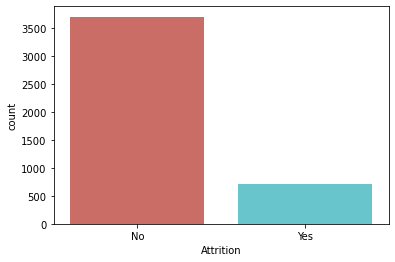

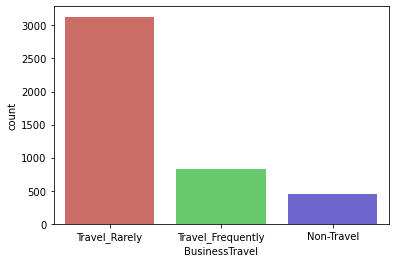

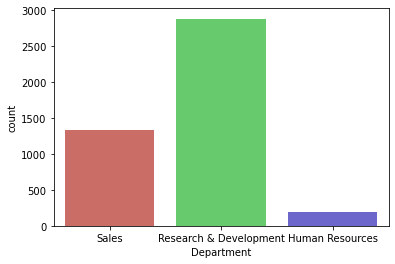

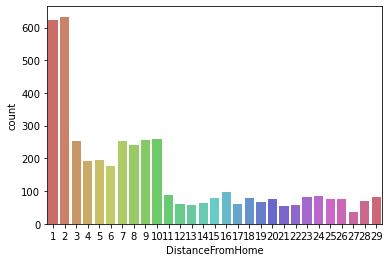

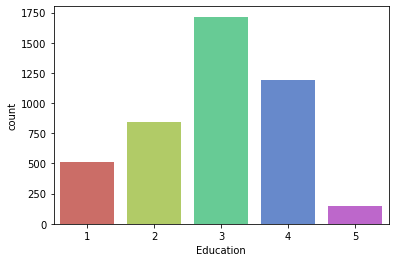

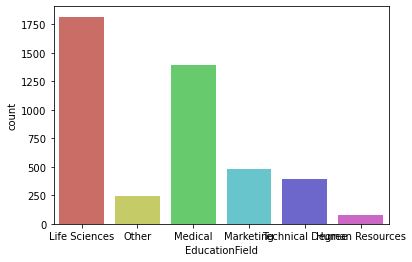

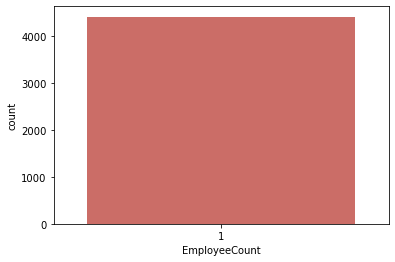

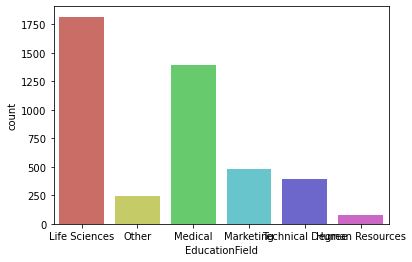

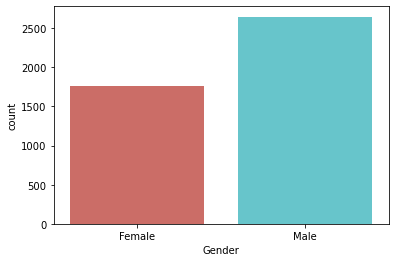

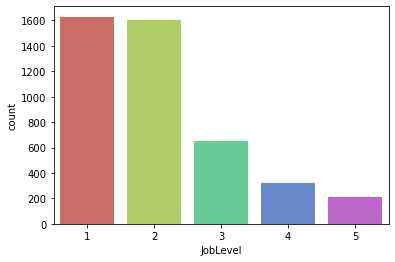

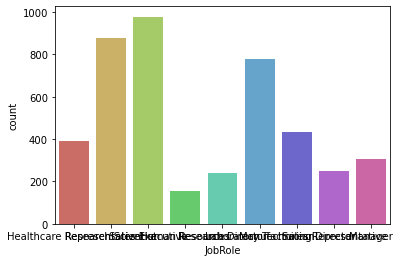

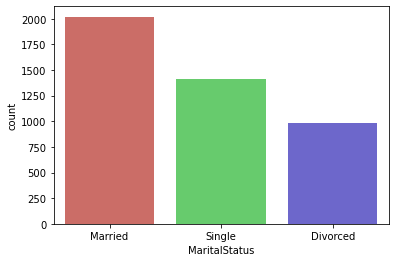

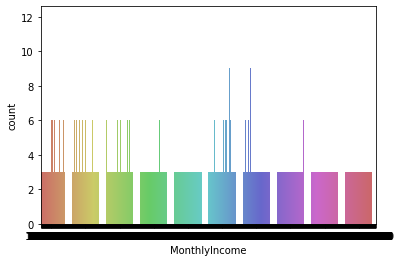

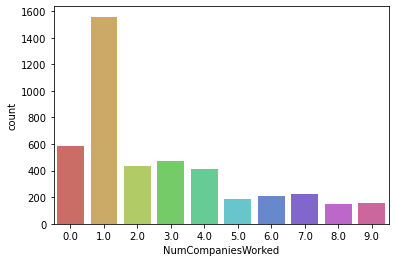

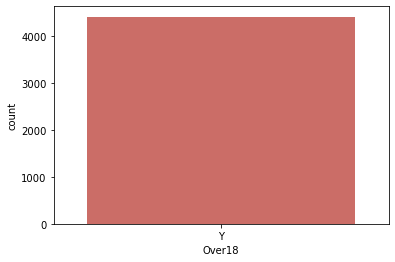

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=alldata.Attrition, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.BusinessTravel, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.Department, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.DistanceFromHome, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.Education, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.EducationField, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.EmployeeCount, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.EducationField, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.Gender, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.JobLevel, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.JobRole, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.MaritalStatus, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.MonthlyIncome, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.NumCompaniesWorked, data= alldata, palette='hls')
plt.show()
sns.countplot(x=alldata.Over18, data= alldata, palette='hls')
plt.show()

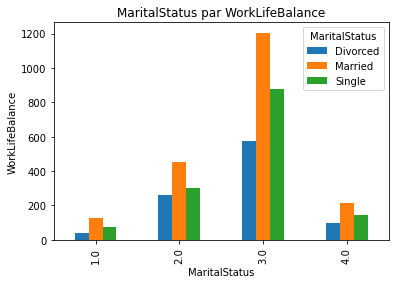

In [54]:
pd.crosstab(alldata.WorkLifeBalance,alldata.MaritalStatus).plot(kind='bar')
plt.title('MaritalStatus par WorkLifeBalance')
plt.xlabel('MaritalStatus')
plt.ylabel('WorkLifeBalance')
plt.show()

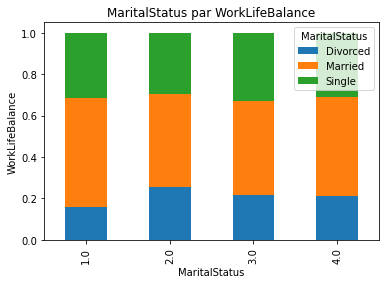

In [55]:
table1 = pd.crosstab(alldata.WorkLifeBalance, alldata.MaritalStatus)
table1.div(table1.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('MaritalStatus par WorkLifeBalance')
plt.xlabel('MaritalStatus')
plt.ylabel('WorkLifeBalance')
plt.show()

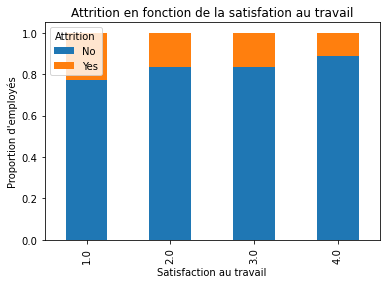

In [56]:
table2 = pd.crosstab(alldata.JobSatisfaction, alldata.Attrition)
table2.div(table2.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Attrition en fonction de la satisfation au travail")
plt.xlabel("Satisfaction au travail")
plt.ylabel("Proportion d'employés")
plt.show()

suppression des nan

In [57]:
copy_alldata = alldata
copy_alldata.dropna(inplace = True)
copy_alldata.isnull().sum().sort_values(ascending=False).head()

WorkLifeBalance    0
MaritalStatus      0
Attrition          0
BusinessTravel     0
Department         0
dtype: int64

remplacement des variables qualitatives en quantitative

In [58]:
#Change Attrition column values to numeric values
attrition={'Yes':1, 'No':0}
Gender={'Female':1, 'Male':0}
MaritalStatus={'Divorced':2, 'Married':1, 'Single':0 }
Department={ 'Research & Development':2, 'Human Resources':1, 'Sales':0 }
BusinessTravel={ 'Travel_Rarely':0, 'Travel_Frequently':1, 'Non-Travel':2}
EducationField={ 'Life Sciences':0, 'Other':1, 'Medical':2, 'Marketing':3, 'Technical Degree':4, 'Human Resources':5}
JobRole={ 'Healthcare Representative':0, 'Research Scientist':1, 'Sales Executive':2, 'Human Resources':3, 'Research Director':4, 'Laboratory Technician':5, 'Manufacturing Director':6, 'Sales Representative': 7, 'Manager':8}
#raw_data.Attrition=[attrition[item] for item in raw_data.Attrition]
copy_alldata.Attrition=copy_alldata.Attrition.map(lambda x:attrition[x])
copy_alldata.EducationField=copy_alldata.EducationField.map(lambda x:EducationField[x])
copy_alldata.Gender=copy_alldata.Gender.map(lambda x:Gender[x])
copy_alldata.MaritalStatus=copy_alldata.MaritalStatus.map(lambda x:MaritalStatus[x])
copy_alldata.Department=copy_alldata.Department.map(lambda x:Department[x])
copy_alldata.BusinessTravel=copy_alldata.BusinessTravel.map(lambda x:BusinessTravel[x])
copy_alldata.JobRole=copy_alldata.JobRole.map(lambda x:JobRole[x])

print(copy_alldata)

      Age  Attrition  BusinessTravel  Department  DistanceFromHome  Education  \
0      51          0               0           0                 6          2   
1      31          1               1           2                10          1   
2      32          0               1           2                17          4   
3      38          0               2           2                 2          5   
4      32          0               0           2                10          1   
...   ...        ...             ...         ...               ...        ...   
4404   29          0               0           0                 4          3   
4405   42          0               0           2                 5          4   
4406   29          0               0           2                 2          4   
4407   25          0               0           2                25          2   
4408   42          0               0           0                18          2   

      EducationField  Emplo

calcule des corélations

In [59]:
corr_features=copy_alldata.corr()
corr_features.iloc[:,1]

Age                       -0.155584
Attrition                  1.000000
BusinessTravel            -0.001888
Department                 0.001769
DistanceFromHome          -0.008314
Education                 -0.015237
EducationField             0.004614
EmployeeCount                   NaN
EmployeeID                -0.001707
Gender                    -0.018624
JobLevel                  -0.014587
JobRole                   -0.034162
MaritalStatus             -0.161126
MonthlyIncome             -0.032629
NumCompaniesWorked         0.043911
PercentSalaryHike          0.034425
StandardHours                   NaN
StockOptionLevel          -0.007971
TotalWorkingYears         -0.168637
TrainingTimesLastYear     -0.046239
YearsAtCompany            -0.133612
YearsSinceLastPromotion   -0.029931
YearsWithCurrManager      -0.155420
EnvironmentSatisfaction   -0.103485
JobSatisfaction           -0.103098
WorkLifeBalance           -0.059817
Name: Attrition, dtype: float64

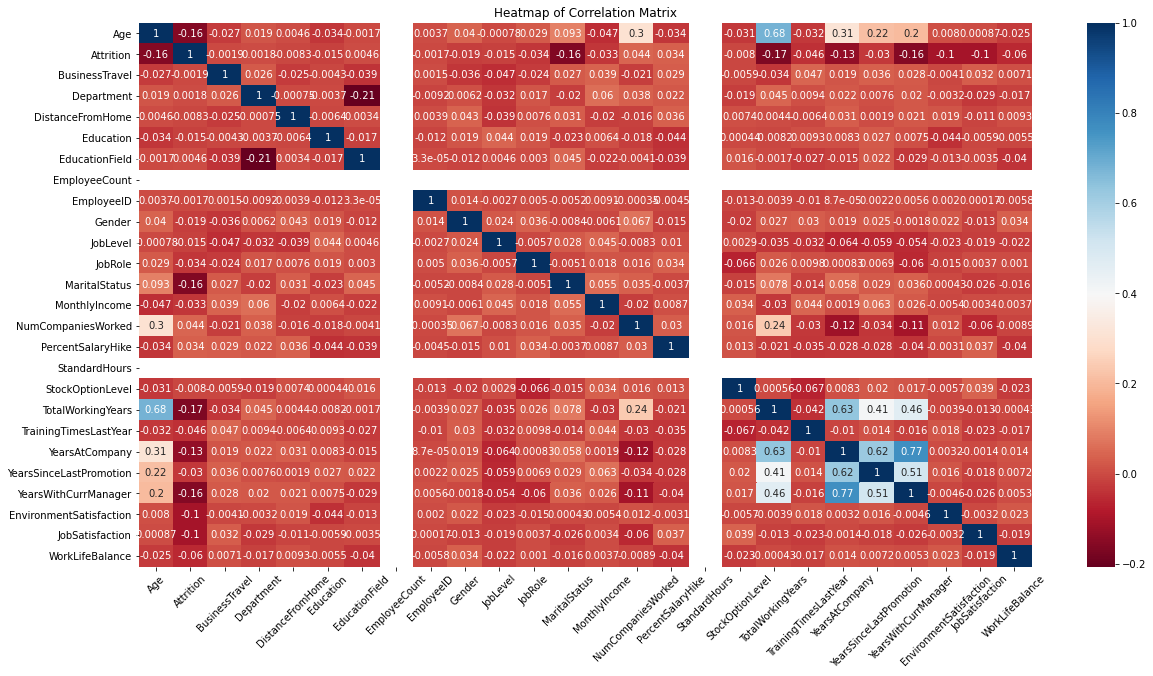

In [60]:
 def Heat_map(data, features):
    plt.figure(figsize=(20, 10))
    sns.heatmap(data[features].corr(), cmap='RdBu', annot=True)
    plt.xticks(rotation=45) 
    plt.title('Heatmap of Correlation Matrix')

Heat_map(copy_alldata,list(copy_alldata.columns))

application d'un model

In [73]:

# X = copy_alldata.loc[:, copy_alldata.columns != 'quit']
X, y = copy_alldata.loc[:, copy_alldata.columns !="Attrition"], copy_alldata.loc[:, "Attrition"]
X = pd.get_dummies(X, drop_first= True)
X.head()
y = pd.get_dummies(y, drop_first= True)
y.head()

from sklearn.model_selection import train_test_split
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [78]:
!pip install graphviz; yellowbrick

In [63]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [74]:
@interact
def plot_tree(crit=["gini", "entropy"],
              split=["best", "random"],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = DecisionTreeClassifier(random_state=0,
                                       criterion=crit,
                                       splitter = split,
                                       max_depth = depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf)
    estimator.fit(X_train, y_train)
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))

#     graph = Source(tree.export_graphviz(estimator,
#                                         out_file=None,
#                                         feature_names=X_train.columns,
#                                         class_names=['0', '1'],
#                                         filled = True))
    
#     display(Image(data=graph.pipe(format='png')))
    
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [75]:
@interact
def plot_tree_rf(crit=["gini", "entropy"],
                 bootstrap=["True", "False"],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = RandomForestClassifier(random_state=1,
                                       criterion=crit,
                                       bootstrap=bootstrap,
                                       n_estimators=forests,
                                       max_depth=depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf,
                                       n_jobs=-1,
                                      verbose=False).fit(X_train, y_train)

    print('Random Forest Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Random Forest Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
    num_tree = estimator.estimators_[0]
    print('\nVisualizing Decision Tree:', 0)
    
#     graph = Source(tree.export_graphviz(num_tree,
#                                         out_file=None,
#                                         feature_names=X_train.columns,
#                                         class_names=['0', '1'],
#                                         filled = True))
    
#     display(Image(data=graph.pipe(format='png')))
    
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

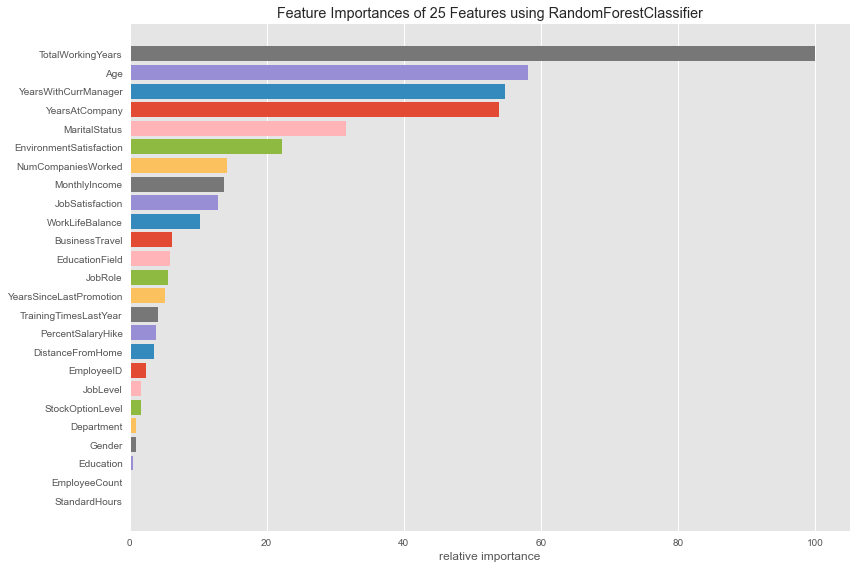

In [79]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

rf = RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=False,
            warm_start=False)

viz = FeatureImportances(rf)
viz.fit(X_train, y_train)
viz.show();

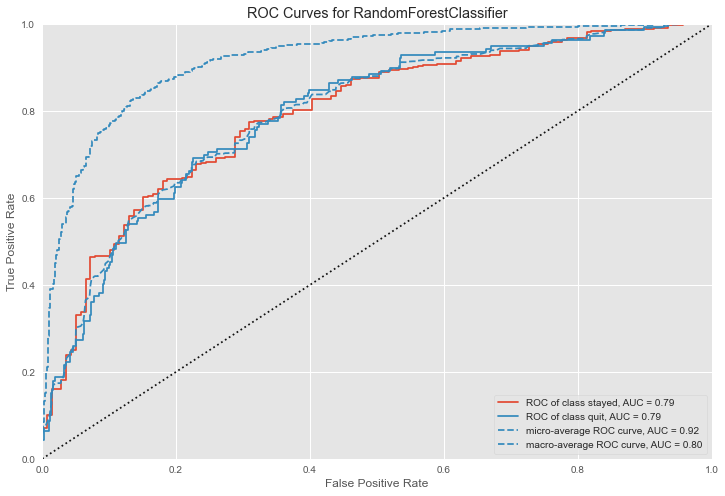

In [80]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf, classes=["stayed", "quit"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof();


C:\Users\Hugo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


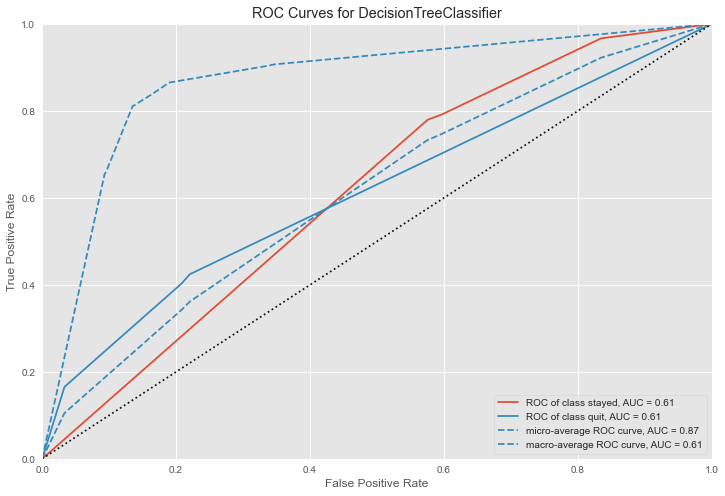

In [81]:
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

visualizer = ROCAUC(dt, classes=["stayed", "quit"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof();

Logistic Regression Accuracy: 0.838


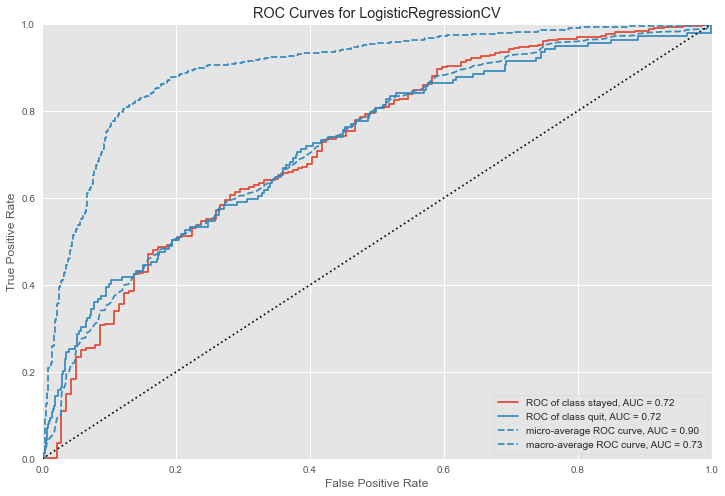

In [82]:
from sklearn.linear_model import LogisticRegressionCV

logit = LogisticRegressionCV(random_state=1, n_jobs=-1,max_iter=500,
                             cv=10)

lr = logit.fit(X_train, y_train)

print('Logistic Regression Accuracy: {:.3f}'.format(accuracy_score(y_test, lr.predict(X_test))))

visualizer = ROCAUC(lr, classes=["stayed", "quit"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof();